## Introduction

The San Francisco Controller's Office maintains a database of the salary and benefits paid to City employees between fiscal years 2013 - 2018.
The dataset hosted by the city of San Francisco. The organization has an open data platform and they update their information according the amount of data that is brought in.
This dataset is updated annually. New data is added on a bi-annual basis when available for each fiscal and calendar year.
Our target is to predict the salary.
The csv file includes 213K observations and 22 features. After cleaning the Nan's and defining the interested population as employees with total annual salary of at least 35,000$, we have almost 150K observations.

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
## print(os.listdir("../input"))
import seaborn as sns
from pandas.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler, MinMaxScaler, FunctionTransformer, OneHotEncoder, KBinsDiscretizer, MaxAbsScaler, LabelEncoder
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.mixture import GaussianMixture
from time import time

## Load Data

In [2]:
df = pd.read_csv('employee-compensation.csv',low_memory=False)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 835307 rows and 22 columns


## Initial exploration of data

In [3]:
df.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
0,Calendar,2028,7,General City Responsibilities,229259,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
1,Calendar,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
2,Fiscal,2028,1,Public Protection,CRT,NaN,792.0,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,...,8540990,674.28,0.00,5.76,680.04,130.91,0.00,53.86,184.77,864.81
3,Calendar,2019,7,General City Responsibilities,232108,NaN,911.0,POA,Q000,Police Services,...,8577148,124709.01,100499.62,5501.78,230710.41,23271.86,14293.60,3934.00,55975.56,286685.97
4,Calendar,2019,1,Public Protection,DAT,NaN,311.0,Municipal Attorneys Assoc,8100,Legal & Court,...,8603109,155489.01,0.00,1500.00,156989.01,29239.75,14308.46,11100.60,69326.83,226315.84


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835307 entries, 0 to 835306
Data columns (total 22 columns):
Year Type                  835307 non-null object
Year                       835307 non-null int64
Organization Group Code    835307 non-null int64
Organization Group         835307 non-null object
Department Code            806544 non-null object
Department                 434809 non-null object
Union Code                 834746 non-null float64
Union                      834746 non-null object
Job Family Code            835307 non-null object
Job Family                 835307 non-null object
Job Code                   835307 non-null object
Job                        835304 non-null object
Employee Identifier        835307 non-null int64
Salaries                   835307 non-null float64
Overtime                   835307 non-null float64
Other Salaries             835307 non-null float64
Total Salary               835307 non-null float64
Retirement                 835307 non

## Check Missing Value(NaN)

In [5]:
print(df.isnull().sum())

Year Type                       0
Year                            0
Organization Group Code         0
Organization Group              0
Department Code             28763
Department                 400498
Union Code                    561
Union                         561
Job Family Code                 0
Job Family                      0
Job Code                        0
Job                             3
Employee Identifier             0
Salaries                        0
Overtime                        0
Other Salaries                  0
Total Salary                    0
Retirement                      0
Health and Dental               0
Other Benefits                  0
Total Benefits                  0
Total Compensation              0
dtype: int64


In [6]:
df[df.Union.isnull() == True].head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,...,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health and Dental,Other Benefits,Total Benefits,Total Compensation
300980,Calendar,2017,2,"Public Works, Transportation & Commerce",MTA,MTA Municipal Transprtn Agncy,NaN,NaN,9100,Street Transit,...,54559,29643.20,143.25,1796.27,31582.72,5731.40,5242.81,2530.76,13504.97,45087.69
301255,Calendar,2017,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,35106,8996.40,0.00,0.00,8996.40,0.00,3675.38,698.26,4373.64,13370.04
301594,Calendar,2017,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,53943,8202.61,0.00,234.16,8436.77,0.00,3351.07,654.83,4005.90,12442.67
303128,Calendar,2017,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,15301,673.91,0.00,7.94,681.85,0.00,275.31,52.90,328.21,1010.06
303132,Calendar,2017,5,Culture & Recreation,REC,REC Recreation & Park Commsn,NaN,NaN,3200,Recreation,...,12481,16232.17,0.00,42.23,16274.40,3359.04,6188.68,1307.98,10855.70,27130.10


In [7]:
df[df.Union.isnull() == True]['Organization Group'].value_counts()

Culture & Recreation                       416
Public Works, Transportation & Commerce    118
Community Health                            27
Name: Organization Group, dtype: int64

In [8]:
df[df.Union.isnull() == True][df['Organization Group'] == 'Communit Health'].Job.value_counts()

/Users/amit.ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Series([], Name: Job, dtype: int64)

In [9]:
df[df.Job == 'Technology Expert II'].shape

(52, 22)

## EDA

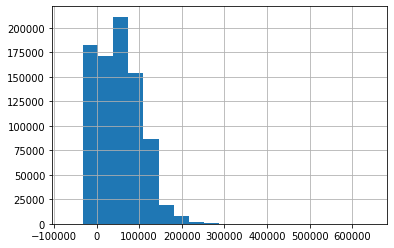

In [10]:
df['Salaries'].hist(bins=20)

In [11]:
total_salary_description = df['Salaries'].describe()
print(total_salary_description)

count    835307.000000
mean      54096.806795
std       47845.576491
min      -68771.780000
25%        5734.080000
50%       52664.000000
75%       85601.040000
max      645739.460000
Name: Salaries, dtype: float64


We are seeing some negative salaries, salaries cannot be negative so lets investigate.
Let's explore how many entries with negative salary is presented.

In [12]:
negative_salaries = df[df['Salaries'] < 0]
negative_salaries_description = negative_salaries['Salaries'].describe()
print(negative_salaries_description)

count      113.00000
mean     -2589.04531
std       7439.10341
min     -68771.78000
25%      -1861.50000
50%       -929.70000
75%       -302.90000
max         -0.01000
Name: Salaries, dtype: float64


In [13]:
negative_salaries_description['mean'] / (total_salary_description['count'] / negative_salaries_description['count'])

-0.3502450236859022

On average, negative values would change mean salary by $1.23. Comparing to mean salary of $63,818.59, that value can be neglected, so all rows will be omitted.

Also all negative values could be inspected with more attention, e.g. what departments are more prone to such values. For the purposes of this research it will be ignored.

In [14]:
corrected_df = df[df['Salaries'] > 0].copy() #copying to avoid warnings later

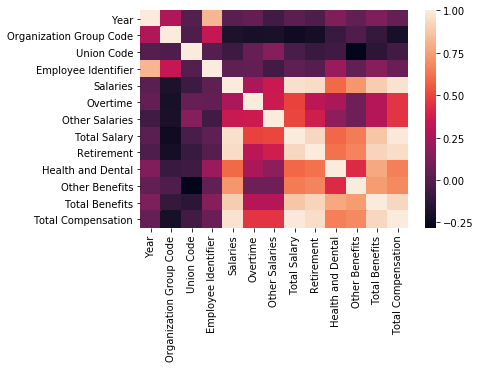

In [15]:
sns.heatmap(corrected_df.corr())

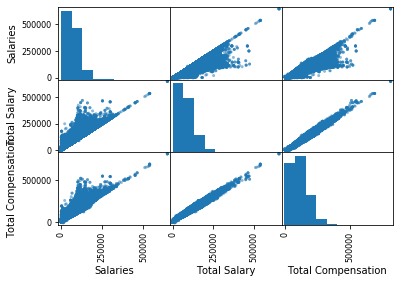

In [16]:
salaries_sm = scatter_matrix(corrected_df[['Salaries', 'Total Salary', 'Total Compensation']])

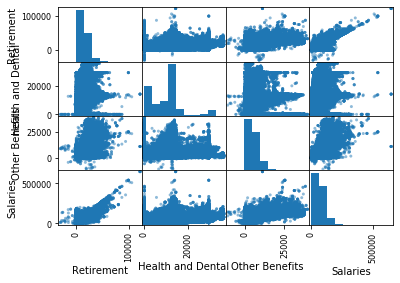

In [17]:
benefits_sm = scatter_matrix(corrected_df[['Retirement', 'Health and Dental', 'Other Benefits', 'Salaries']])

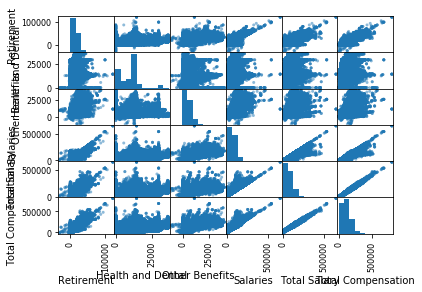

In [18]:
total_comp_sm = scatter_matrix(corrected_df[['Retirement', 'Health and Dental', 'Other Benefits', 'Salaries', 'Total Salary', 'Total Compensation']])

In [19]:
print(corrected_df.corr())

                             Year  Organization Group Code  Union Code  \
Year                     1.000000                 0.272428    0.000267   
Organization Group Code  0.272428                 1.000000   -0.016097   
Union Code               0.000267                -0.016097    1.000000   
Employee Identifier      0.820786                 0.337910   -0.000050   
Salaries                 0.021324                -0.182923   -0.074664   
Overtime                 0.047006                -0.199745    0.056852   
Other Salaries          -0.063583                -0.192342    0.150896   
Total Salary             0.021030                -0.226231   -0.032227   
Retirement              -0.015807                -0.208970   -0.089034   
Health and Dental        0.135772                -0.086495   -0.065639   
Other Benefits           0.044373                -0.018694   -0.280619   
Total Benefits           0.125144                -0.103981   -0.132510   
Total Compensation       0.049914     

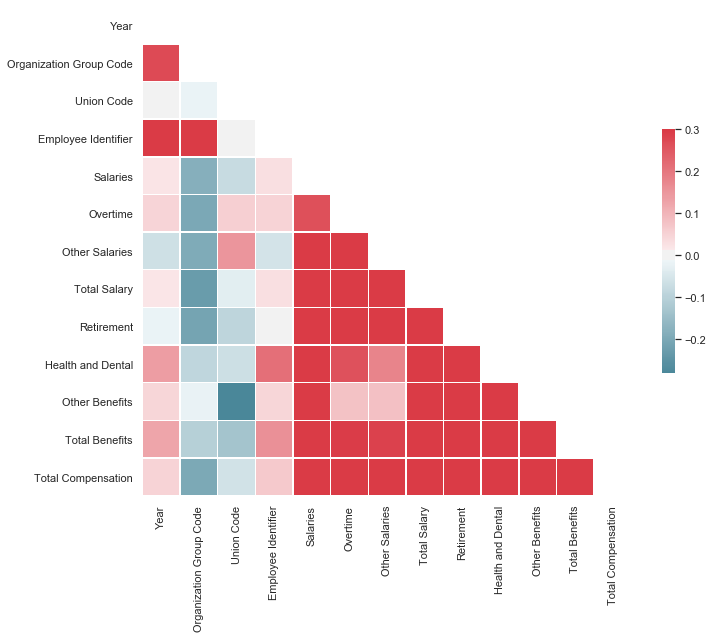

In [20]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")


# Compute the correlation matrix
corr = corrected_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Target

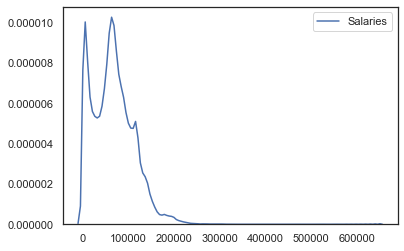

In [21]:
ax = sns.kdeplot(corrected_df['Salaries'])

In [22]:
corrected_df['Salaries'].describe()

count    713717.000000
mean      63313.237538
std       45778.124271
min           0.030000
25%       24073.890000
50%       61735.010000
75%       92173.780000
max      645739.460000
Name: Salaries, dtype: float64

In [23]:
corrected_df['Total Compensation'].describe()

count    713717.000000
mean      99687.569157
std       70877.558851
min       -8965.960000
25%       37001.320000
50%       99520.200000
75%      145616.700000
max      813194.020000
Name: Total Compensation, dtype: float64

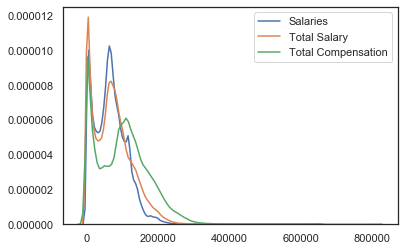

In [24]:
salary = ['Salaries', 'Total Salary', 'Total Compensation']
for col in salary:
    ax_salary = sns.kdeplot(corrected_df[col])
    ax_salary

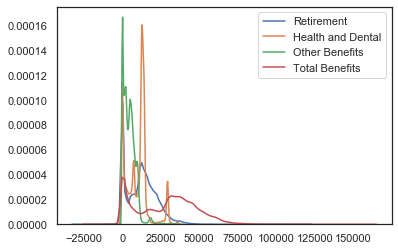

In [25]:
benefits = ['Retirement', 'Health and Dental', 'Other Benefits', 'Total Benefits']
for col in benefits:
    ax_benefits = sns.kdeplot(corrected_df[col])
    ax_benefits

In [26]:
df1 = corrected_df[corrected_df['Salaries'] > 35000]
## How many organizations we are losing by reducing the data to salaries <35,000
org_x = corrected_df[corrected_df.Salaries<35000]['Organization Group'].value_counts()
org_y = corrected_df['Organization Group'].value_counts()
org_z = pd.concat([org_x, (org_x/org_y)], axis=1, join='inner', sort=False)
org_z.columns = ['Organization Count', 'Organization %']
org_z

,Organization Count,Organization %
"Public Works, Transportation & Commerce",46158,0.238702
General City Responsibilities,41464,0.424254
Community Health,38241,0.281805
Culture & Recreation,34592,0.614980
Human Welfare & Neighborhood Development,23843,0.425054
Public Protection,17584,0.148515
General Administration & Finance,17559,0.312605


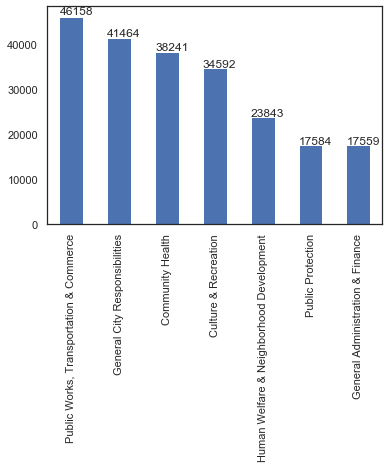

In [27]:
org_ax = org_z['Organization Count'].plot('bar')
for p in org_ax.patches:
    org_ax.annotate(int(p.get_height()), (p.get_x(), p.get_height()*1.01))

In [28]:
## How many departments we are losing by reducing the data to salaries <35,000
dep_x = corrected_df[corrected_df.Salaries<35000].Department.value_counts()
dep_y = corrected_df.Department.value_counts()
dep_z = pd.concat([org_x, (org_x/org_y)], axis=1, join='inner', sort=False)
dep_z.columns = ['Department Count', 'Department %']
dep_z

,Department Count,Department %
"Public Works, Transportation & Commerce",46158,0.238702
General City Responsibilities,41464,0.424254
Community Health,38241,0.281805
Culture & Recreation,34592,0.614980
Human Welfare & Neighborhood Development,23843,0.425054
Public Protection,17584,0.148515
General Administration & Finance,17559,0.312605


In [29]:
## How many jobs we are losing by reducing the data to salaries <35,000
job_x = corrected_df[corrected_df.Salaries<35000].Job.value_counts()
job_y = corrected_df.Job.value_counts()
job_z = pd.concat([org_x, (org_x/org_y)], axis=1, join='inner', sort=False)
job_z.columns = ['Job Count', 'Job %']
job_z

,Job Count,Job %
"Public Works, Transportation & Commerce",46158,0.238702
General City Responsibilities,41464,0.424254
Community Health,38241,0.281805
Culture & Recreation,34592,0.614980
Human Welfare & Neighborhood Development,23843,0.425054
Public Protection,17584,0.148515
General Administration & Finance,17559,0.312605


# Let's explore top departments by average individual salaries and by department salaries budgets.

In [30]:
groupped_by_department = corrected_df.groupby(by='Department')
departments_stats = groupped_by_department['Salaries'].agg(['mean', 'sum', 'count', 'std'])
departments_stats['sum'] = departments_stats['sum'] / 1000000000.0

top_departments_by_department_budget = departments_stats.sort_values(by='sum', ascending=False).iloc[0:10]
top_departments_by_average_salary = departments_stats.sort_values(by='mean', ascending=False).iloc[0:10]

In [31]:
def plot_salaries(entries, title, field_name):

    def calc_95_ci(entry):
        mean = entry['mean']
        z = 1.960
        std = entry['std']
        n = entry['count']
        diff = z*std/np.sqrt(n)
        return (mean - diff, mean + diff, diff)

    cb_dark_blue = (0/255, 107/255, 164/255)
    cb_orange = (255/255, 128/255, 14/255)
    cb_light_gray = (171/255, 171/255, 171/255)

    fig = plt.figure()
    fig.set_size_inches(18, 12)
    ax1 = fig.add_subplot(111)

    ax1.set_title(title)

    plt.sca(ax1)
    x_labels = entries.index
    plt.xticks(range(10), x_labels, rotation=60)

    sums = entries['sum'].values
    bar1 = ax1.bar([x for x in range(0, 10)], sums, width=0.8, color=cb_dark_blue)
    #ax1.set_ylim([0, 4])
    ax1.set_ylabel("Department " + field_name + " budget, billions of USD")

    ax2 = ax1.twinx()
    means = entries['mean'].values
    bar2 = ax2.bar(range(0, 10), means, width=0.3, color=cb_orange)
    #ax2.set_ylim([0, 170000])
    ax2.set_ylabel("Individual " + field_name + ", USD")

    fig.legend([bar1, bar2], ['Department ' + field_name + ' budget', 'Mean individual ' + field_name], loc=(0.55, 0.9), ncol=2)

    confidence_intervals = [calc_95_ci(entries.loc[x_labels[i]]) for i in range(0, len(x_labels))]
    salaries = entries['mean'].as_matrix()
    for i in range(0, len(x_labels)):
        plt.errorbar(i, salaries[i], xerr=0, yerr=confidence_intervals[i][2], capsize=10, color='black')

    plt.show()

/Users/amit.ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


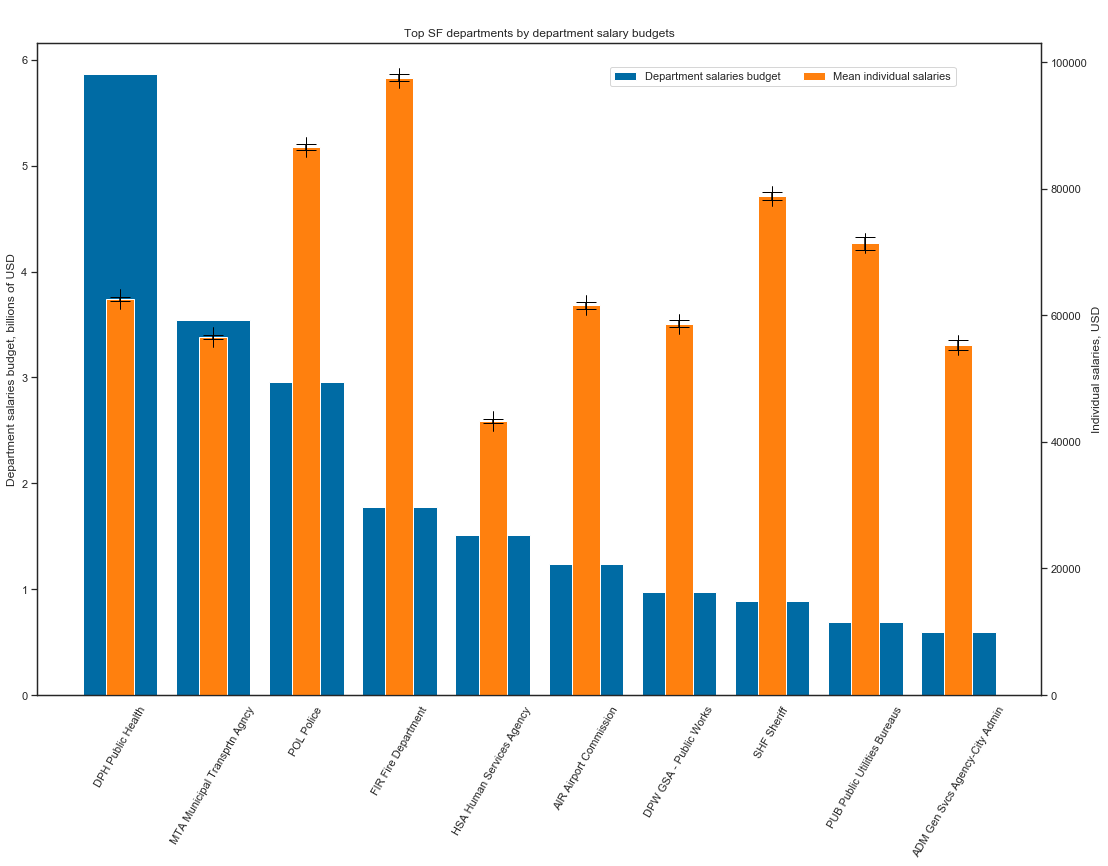

In [32]:
plot_salaries(top_departments_by_department_budget, 'Top SF departments by department salary budgets', 'salaries')

/Users/amit.ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


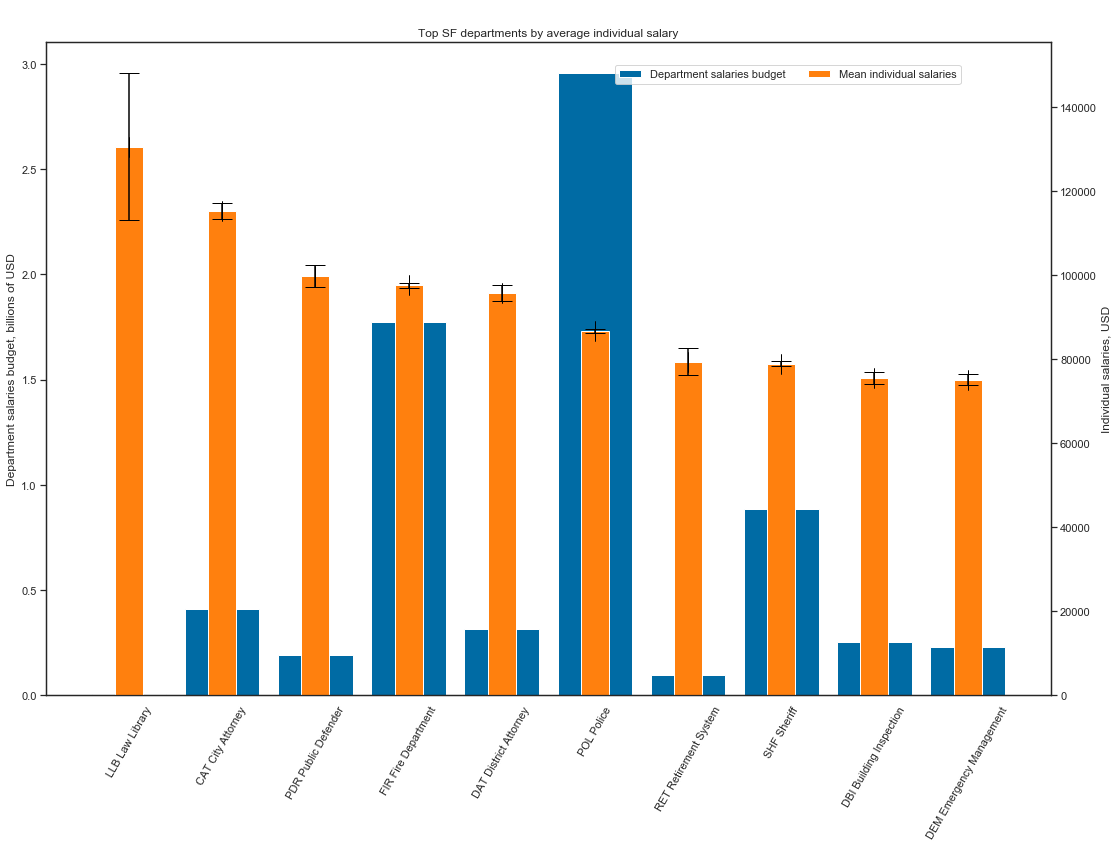

In [33]:
plot_salaries(top_departments_by_average_salary, 'Top SF departments by average individual salary', 'salaries')

Now let's explore compensations in details. Salary is only one of components of total compensations.

# Guaranteed compensations

Let's explore guaranteed compensations. That includes all benefits and salary, but excludes payments for overtime and other salaries that are not guaranteed in any way.

In [34]:
corrected_df['Guaranteed Compensations'] = corrected_df['Salaries'] + corrected_df['Total Benefits']

groupped_by_department = corrected_df.groupby(by='Department')
departments_compensation_stats = groupped_by_department['Guaranteed Compensations'].agg(['mean', 'sum', 'count', 'std'])
departments_compensation_stats['sum'] = departments_compensation_stats['sum'] / 1000000000.0

top_departments_by_compensation_budget = departments_compensation_stats.sort_values(by='sum', ascending=False).iloc[0:10]
top_departments_by_compensation = departments_compensation_stats.sort_values(by='mean', ascending=False).iloc[0:10]

/Users/amit.ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


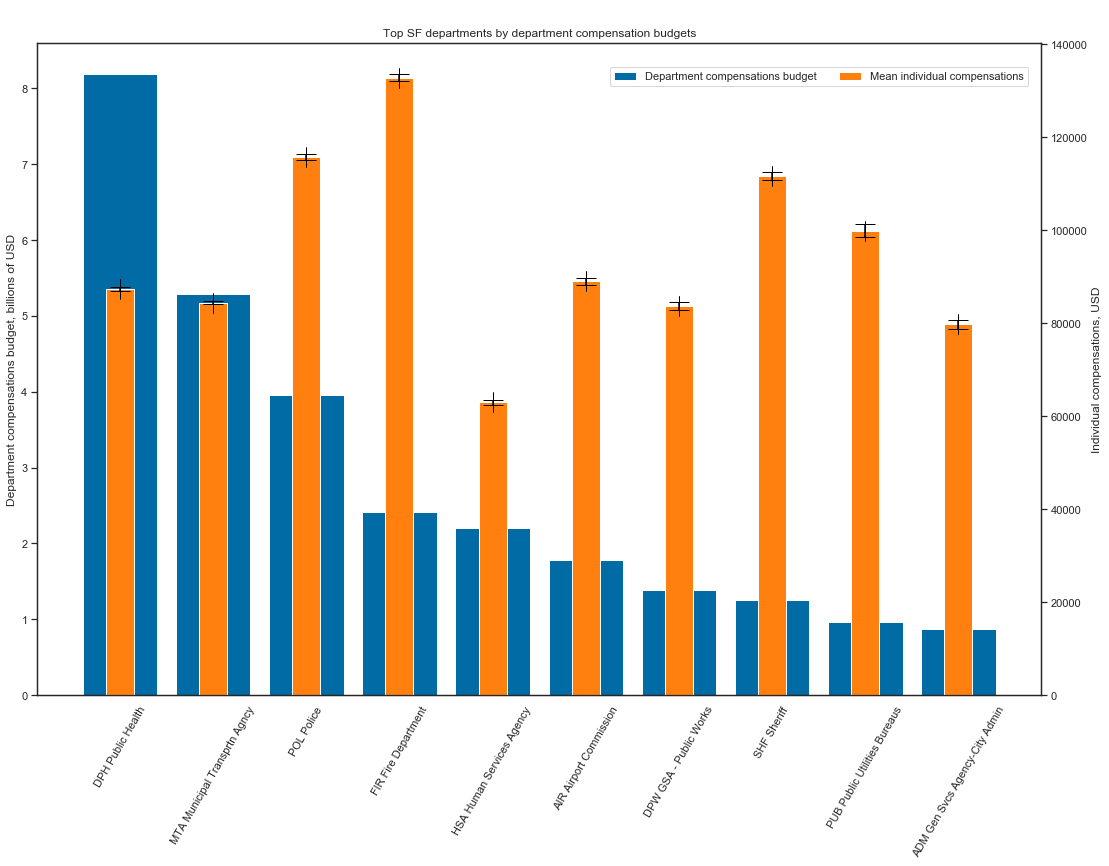

In [35]:
plot_salaries(top_departments_by_compensation_budget, 'Top SF departments by department compensation budgets', 'compensations')

/Users/amit.ranjan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


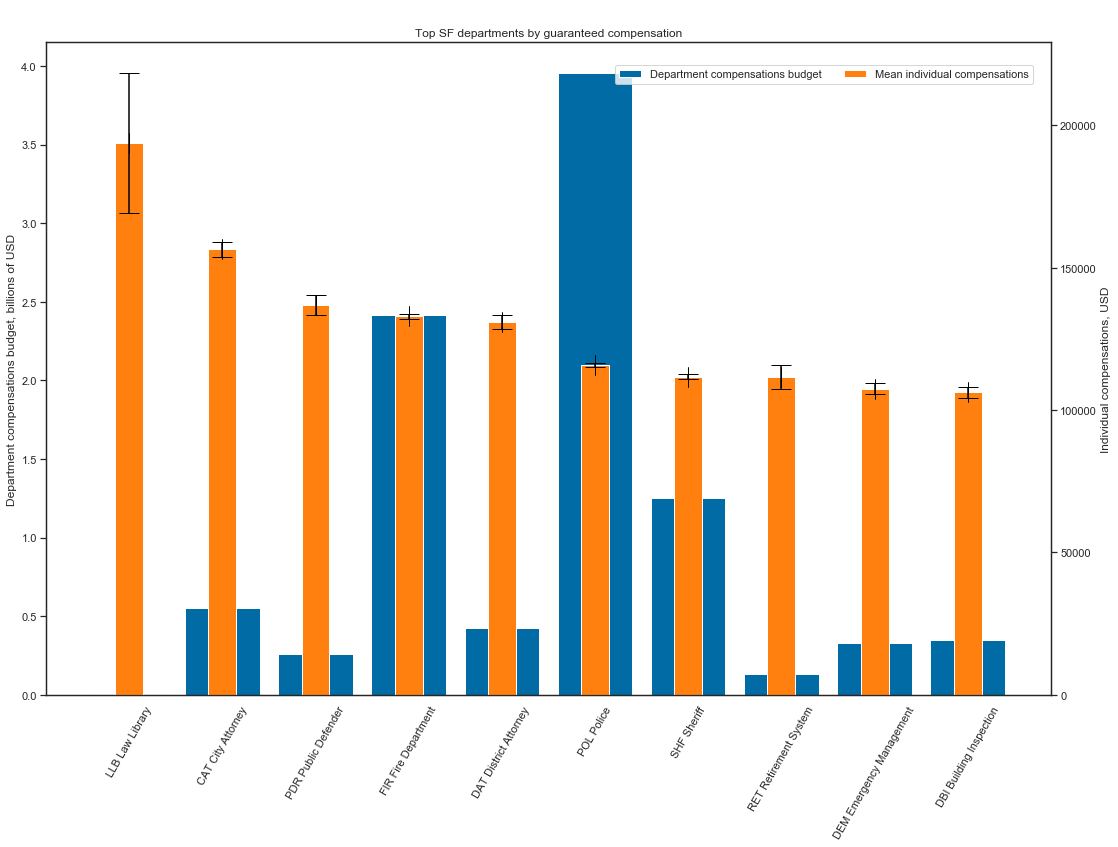

In [36]:
plot_salaries(top_departments_by_compensation, 'Top SF departments by guaranteed compensation', 'compensations')

Let's check if top lists for salaries and compensations are identical.

In [37]:
all(top_departments_by_compensation_budget.index == top_departments_by_department_budget.index)

True

Top lists for department budgets in both categories are identical.

In [38]:
all(top_departments_by_compensation.index == top_departments_by_average_salary.index)

False

Top lists for individual salaries and compensations are different. Let's explore it.

In [39]:
df_by_salary = top_departments_by_average_salary.reset_index(drop=False)[['Department', 'mean']]
df_by_salary[['Department by salary', 'Salary']] = df_by_salary[['Department', 'mean']]
df_by_salary = df_by_salary[['Department by salary', 'Salary']]

df_by_compensation = top_departments_by_compensation.reset_index(drop=False)[['Department', 'mean']]
df_by_compensation[['Department by compensation', 'Compensation']] = df_by_compensation[['Department', 'mean']]
df_by_compensation = df_by_compensation[['Department by compensation', 'Compensation']]

compare_df = pd.concat([df_by_salary, df_by_compensation], axis=1)
compare_df.head(10)

,Department by salary,Salary,Department by compensation,Compensation
0,LLB Law Library,130550.191053,LLB Law Library,193656.042632
1,CAT City Attorney,115187.183780,CAT City Attorney,156404.225238
2,PDR Public Defender,99710.752017,PDR Public Defender,136885.705695
3,FIR Fire Department,97532.573128,FIR Fire Department,132874.166907
4,DAT District Attorney,95727.394895,DAT District Attorney,130993.454040
5,POL Police,86626.460841,POL Police,115795.588324
6,RET Retirement System,79365.535892,SHF Sheriff,111688.977321
7,SHF Sheriff,78877.634304,RET Retirement System,111596.429520
8,DBI Building Inspection,75490.752176,DEM Emergency Management,107527.742032
9,DEM Emergency Management,75029.822082,DBI Building Inspection,106208.651973


Top list for individual salaries and compensations are almost identical. The only difference is SHF Sheriff department is slightly better with compensations in comparison with RET Retirement System department.

While we're here, let's explore how big is the part of benefits for each department in comparison with the salary.

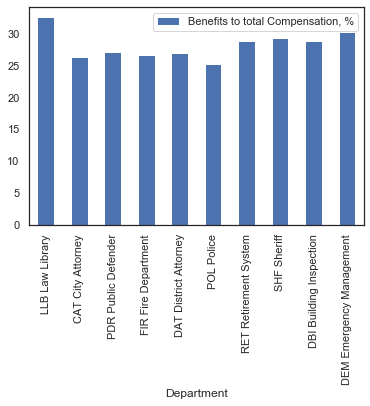

In [40]:
direct_comparison_df = top_departments_by_average_salary[['mean']].join(
    top_departments_by_compensation[['mean']], lsuffix=' salary', rsuffix=' compensation')


direct_comparison_df['Benefits to total Compensation, %'] = (
    (direct_comparison_df['mean compensation'] - direct_comparison_df['mean salary']) / direct_comparison_df['mean compensation']) * 100
direct_comparison_df = direct_comparison_df.reset_index(drop=False)
direct_comparison_df.plot(kind='bar',x='Department',y='Benefits to total Compensation, %')

We can see from the plot that benefits are from ~25 to ~33% of total compensations for the top 10 departments.

####Goal
1) Linear Regression and Predict the Total Compensation of a given worker.
2) Multiclass classifiction on Low, Medium, Average, Above Average and High

Do using One Hot Encoding, Multi class classifier, PCA for Dinmensionality Reduction Expecting Accuracy of 90%+

### Saves the Dataframe as pickle.

import pickle 

pickle_out = open("corrected_df.pickle","wb")
pickle.dump(corrected_df, pickle_out)
pickle_out.close()

pickle_in = open("corrected_df.pickle","rb")
example_df = pickle.load(pickle_in)
print(example_df.shape)

In [41]:
corrected_df.to_pickle('my_df.pickle')
del corrected_df


corrected_df_new = pd.read_pickle('my_df.pickle')
print(corrected_df_new.shape)